In [35]:
from sklearn import datasets
import numpy as np

In [36]:
"""
loading the Iris dataset
"""
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print(y.shape)
print(X.shape)
print(y)

(150,)
(150, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [37]:
"""
splitting the data into train and test data after shuffling
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(105, 2)
(45, 2)


In [38]:
"""
normalizing the data
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [39]:
"""
learn a off-the-shelf Perceptron model using training data
"""
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [40]:
"""
evaluate learned model with test data
"""
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print("Accuracy: %.2f" % ((y_test == y_pred).sum()/y_test.shape[0]))
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy: 0.91
Accuracy: 0.91


In [41]:
"""
create a function to visualize test examples
"""
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        cmap = ListedColormap('yellow')
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=cmap(1), 
                    alpha=1.0, linewidth=1, marker='x', s=55, label='test set')

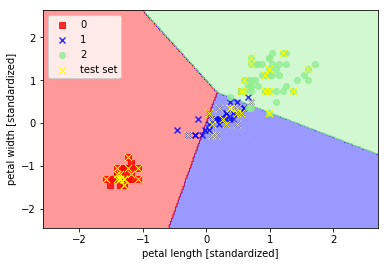

In [42]:
"""
plot test data based on the classifier trained on the training data.
We can see that training examples are not p
"""
X_combined_std = np.vstack((X_train_std, X_test_std)) # stack vertically
y_combined = np.hstack((y_train, y_test)) # stack horizontally
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(100,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

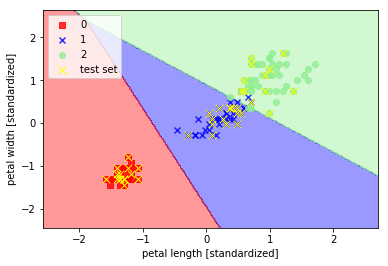

[[-7.34015187 -6.64685581]
 [ 2.54373335 -2.3421979 ]
 [ 9.46617627  6.44380858]]


In [43]:
"""
Use logistic regression for classification of non-linear dataset. This will perform better
than perceptron and Adaline.
"""
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
print(lr.coef_)

(10, 3, 2)


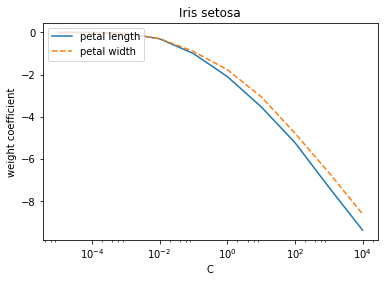

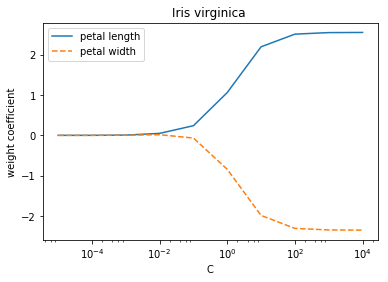

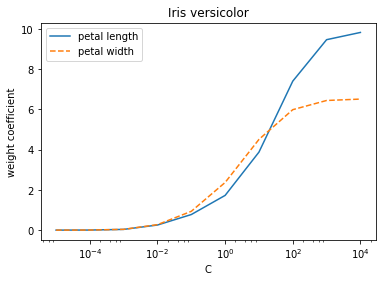

In [44]:
"""
To visualise how the weights vary with the regularization parameter. High c = low lambda = less
regularization = high weights. So, high c -> high |w|; low c -> less |w|.
We see this variation for all the 3 classes of the dataset.
"""
weights = []
params = []
for c in np.arange(-5, +5):
    lr = LogisticRegression(C=10.0**c, random_state=0)
    lr.fit(X_train_std, y_train)
    # lr.coef_ has shape [n_classes, n_features]
    #weights.append(lr.coef_[1]) # choosing weights for second class
    weights.append(lr.coef_) # putting all the weights
    params.append(10.0**c)
weights = np.array(weights)
print(weights.shape) # dimension = n_c X n_classes X n_features

class_name = ['Iris setosa', 'Iris virginica ', 'Iris versicolor']
for class_no in range(weights.shape[1]):
    plt.plot(params, weights[:, class_no, 0], label='petal length')
    plt.plot(params, weights[:, class_no, 1], linestyle='--', label='petal width')
    plt.ylabel('weight coefficient')
    plt.xlabel('C')
    plt.legend(loc='upper left')
    plt.xscale('log')
    plt.title(class_name[class_no])
    plt.show()

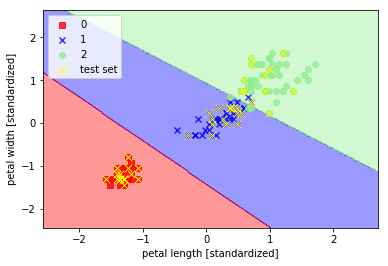

In [45]:
"""
Training a liner SVM
"""
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Accuracy with C=1.00 is 0.98
Accuracy with C=10.00 is 0.98
Accuracy with C=100.00 is 0.98
Accuracy with C=1000.00 is 0.98
Accuracy with C=10000.00 is 0.96
Accuracy with C=100000.00 is 0.96


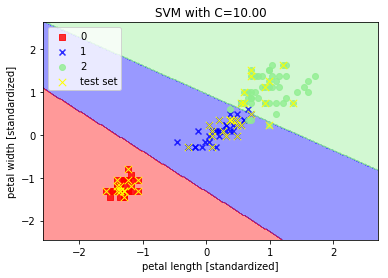

In [46]:
"""
Finding the best C parameter for SVM.
Large C can cause overfitting and performs poorly in presence of outliers. It tries to fit them
too.
"""
X_test_std = X_combined_std[105:150, :]
y_test_std = y_combined[105:150]
best_accuracy, best_C = -1, -1
for c in range(6):
    svm = SVC(kernel='linear', C=10**c, random_state=0)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test_std, y_pred)
    print('Accuracy with C=%.2f is %.2f' %((10**c), accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = 10**c

# train the best svm now
svm = SVC(kernel='linear', C=10**best_C, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('SVM with C=%.2f' %(10**best_C))
plt.show()

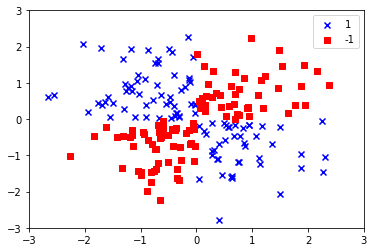

In [47]:
"""
Creating a non-linear dataset using XOR gate
"""
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # binary array
y_xor = np.where(y_xor, 1, -1) # convert 0 to -1, 1 to 1
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0, 3.0)
plt.xlim(-3, 3)
plt.legend()
plt.show()

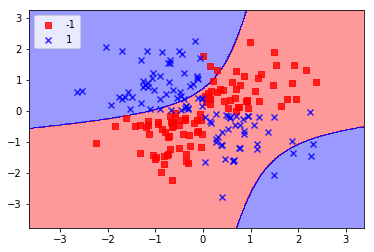

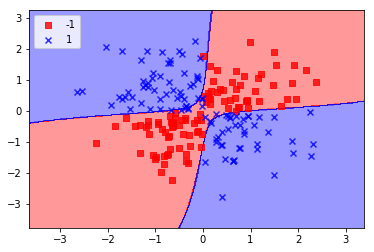

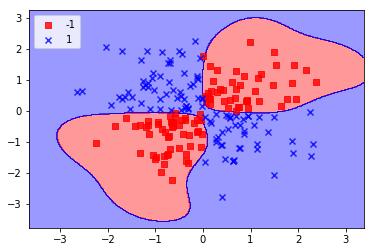

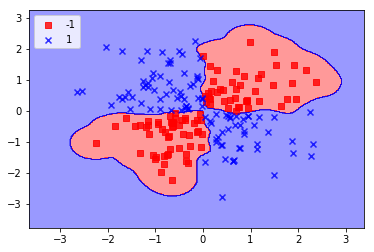

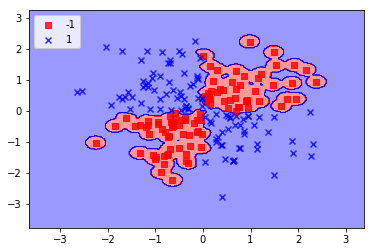

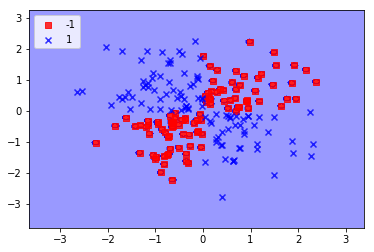

'\nPoints to know:\nAs gamma increases, the decision boundary becomes softer and variance increases.\nLess gamma creates more bias.\nVery high gamma causes overfitting of the training examples.\n'

In [48]:
"""
Classifying non-linear data with SVM having gaussian kernel
"""
for gamma in np.logspace(-2.0, 3.0, num=6):
    svm = SVC(kernel='rbf', random_state=0, gamma=gamma, C=10.0)
    svm.fit(X_xor, y_xor)
    plot_decision_regions(X_xor, y_xor, classifier=svm)
    plt.legend(loc='upper left')
    plt.show()

"""
Points to know:
As gamma increases, the decision boundary becomes softer and variance increases.
Less gamma creates more bias.
Very high gamma causes overfitting of the training examples.
"""

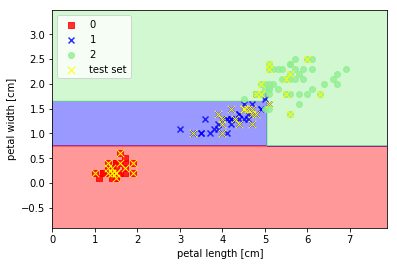

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

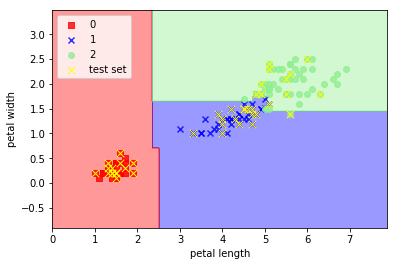

In [50]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: number of decision trees that'll be created
# n_jobs: number of parallel cores running
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

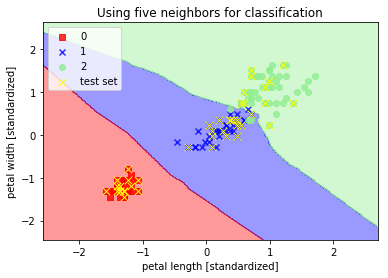

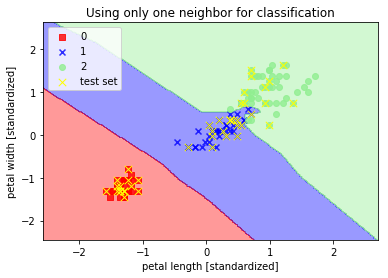

In [53]:
from sklearn.neighbors import KNeighborsClassifier
'''
If number of neighbors is kept very less, then a line of outliers can be classified separately.
'''
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Using five neighbors for classification')
plt.show()

# using only one NN to determine the class. Not a good technique.
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Using only one neighbor for classification')
plt.show()